#Case 2

Importing packages and dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading the data (data_comexstat.csv)

In [ ]:
df = pd.read_csv('data_comexstat.csv', encoding='latin1')
df.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


Fixing the date type

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,product,state,country,type,route,tons,usd,year,month
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1997,1
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1997,1
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997,1
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997,1
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1997,1


##1 Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’;

In [ ]:
df['product'].unique()

array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

In [ ]:
soy_df = df[df['product'].str.contains('soybean')]
soy_df.head()

,date,product,state,country,type,route,tons,usd,year,month
19,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,419.070,119318.0,1997,1
20,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,5000.000,1414250.0,1997,1
21,1997-01-01,soybean_meal,MS,Germany,Export,Sea,140.672,38378.0,1997,1
22,1997-01-01,soybean_meal,MS,Hungary,Export,Sea,15000.000,4042100.0,1997,1
23,1997-01-01,soybean_meal,MS,Netherlands,Export,Sea,14000.000,3850162.0,1997,1


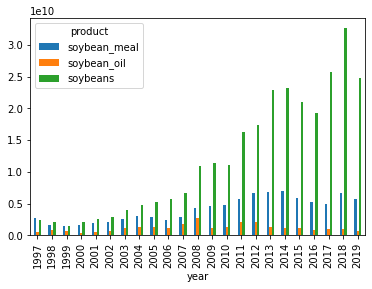

In [ ]:
soy_df[soy_df['type'] == 'Export'].groupby(['year', 'product']).sum()['usd'].unstack().plot.bar()

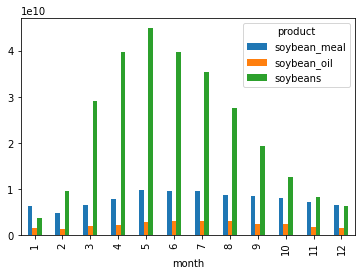

In [104]:
soy_df[soy_df['type'] == 'Export'].groupby(['month', 'product']).sum()['usd'].unstack().plot.bar()

##2 What are the 3 most important products exported by Brazil in the last 5 years?



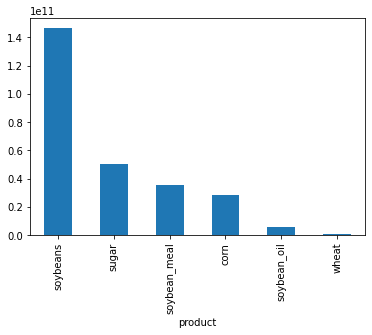

In [114]:
df[(df['type'] == 'Export') & 
   (df['year'].max() - df['year'] <= 5)].groupby('product').sum().sort_values('usd', ascending=False)['usd'].plot.bar()

The 3 most important products exported by Brazil in the last 5 years are SOYBEANS, SUGAR and SOYBEAN MEAL

##3 What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importance of routes depending on the product?

Considering 3 years

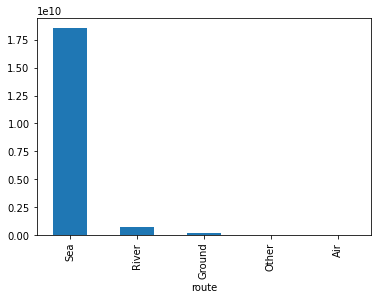

In [149]:
df[(df['type'] == 'Export') & 
   (df['product'] == 'corn') & 
   (df['year'].max() - df['year'] <= 3)].groupby('route').sum().sort_values('usd', ascending=False)['usd'].plot.bar()

The most important exporting route for corn in the last few years is through the SEA.

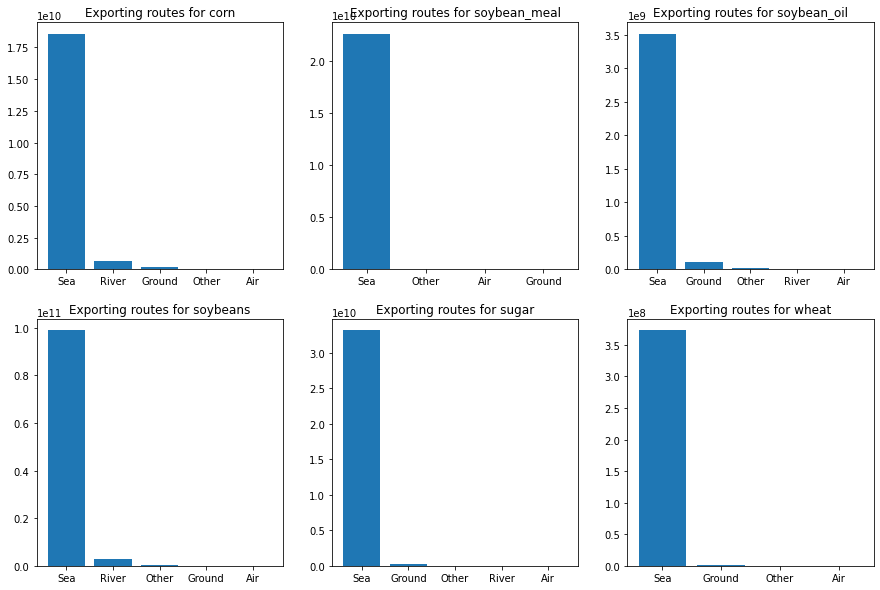

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, prod in enumerate(df['product'].unique()):
  temp_df = df[(df['type'] == 'Export') & 
               (df['product'] == prod) & 
               (df['year'].max() - df['year'] <= 3)].groupby(['route']).sum().sort_values('usd', ascending=False)['usd']
  axes[int(i/3), i%3].set_title(f'Exporting routes for {prod}')
  axes[int(i/3), i%3].bar(temp_df.index, temp_df)

It is possible to notice that the exporting route for every product is basically through SEA regardless of the product. 


The second most important rout is ground for soybeans, sugar, wheat and soybean oil. For corn river is the second most important exporting route and for soybean meal other is the second most important exporting route.

##4 Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?



Plotting the 20 most important trade partners for corn and sugar in the last 3 years.

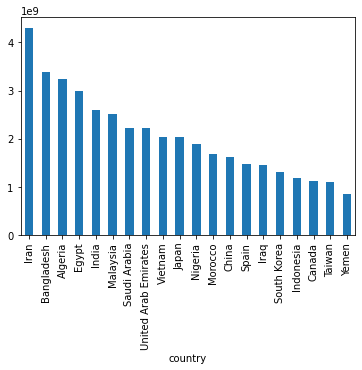

In [153]:
df[((df['product'] == 'corn') | 
    (df['product'] == 'sugar')) & 
    (df['year'].max() - df['year'] <= 3)].groupby('country').sum().sort_values('usd', ascending=False)['usd'][0:20].plot.bar()

We notice that the monst important partners for Brazil in terms of corn and sugar are Iran, Bangladesh, Algeria, Egypt and India.


##5 For each of the products in the dataset, show the 5 most important states in terms of exports?



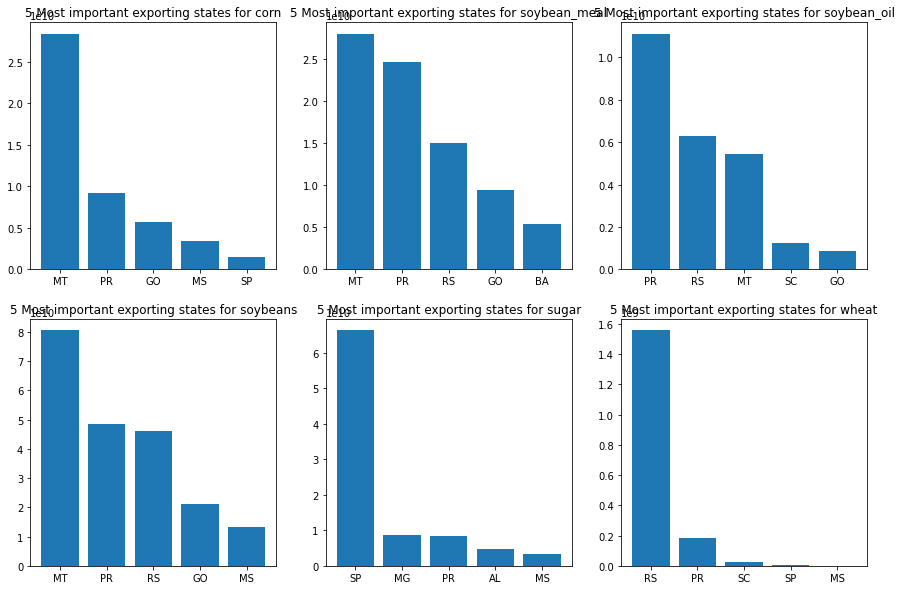

In [158]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, prod in enumerate(df['product'].unique()):
  temp_df = df[(df['type'] == 'Export') & 
               (df['product'] == prod)].groupby(['state']).sum().sort_values('usd', ascending=False)[0:5]['usd']
  axes[int(i/3), i%3].set_title(f'5 Most important exporting states for {prod}')
  axes[int(i/3), i%3].bar(temp_df.index, temp_df)